In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import re
import numpy as np
from collections import Counter

In [43]:
df1 = pd.read_csv('node1.csv',sep=',', skiprows=1,names= ["NODE"],encoding='latin-1')
df1

,NODE
0,James Harden
1,Kevin Durant
2,Kawhi Leonard
3,Anthony Davis
4,Russell Westbrook
...,...
151,Phoenix Suns
152,Denver Nuggets
153,New Orleans Hornets
154,Charlotte Bobcats


In [44]:
df2 = pd.read_csv('data1.csv',sep=',', skiprows=1,names= ["Player", "Team"],encoding='latin-1')
df2

,Player,Team
0,Stephen Curry,Golden State Warriors
1,James Harden,Houston Rockets
2,Kevin Durant,Golden State Warriors
3,Kawhi Leonard,San Antonio Spurs
4,Anthony Davis,New Orleans Pelicans
...,...,...
434,Antonio McDyess,Denver Nuggets
435,Gary Payton,Seattle SuperSonics
436,Rasheed Wallace,Portland Trail Blazers
437,David Robinson,San Antonio Spurs


In [45]:
G = nx.Graph()

In [46]:
for index, row in df1.iterrows():
    G.add_node(row['NODE'])
    
for index, row in df2.iterrows():
    G.add_weighted_edges_from([(row['Player'], row['Team'],1)])

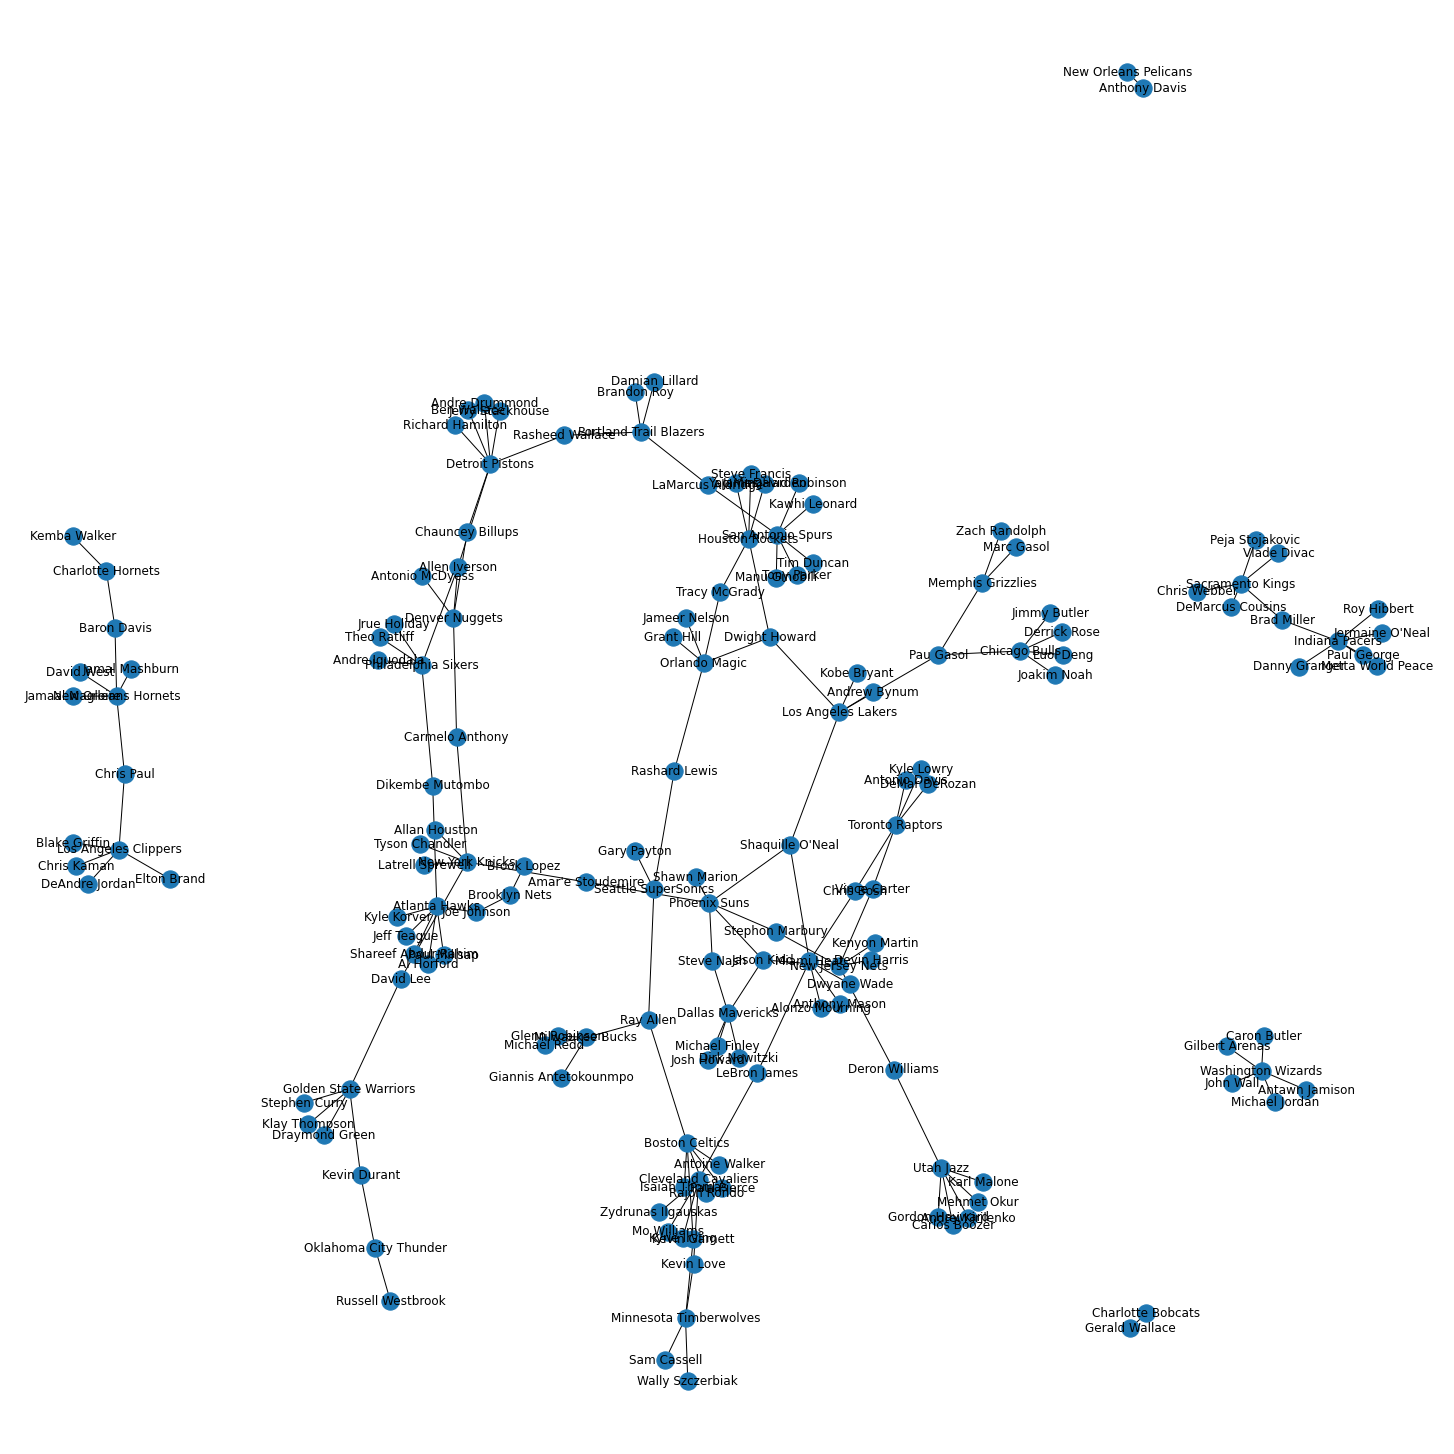

In [47]:
plt.figure(figsize=(20,20)) 
nx.draw(G,with_labels = True)
plt.show()

In [48]:
nodes_0 = list(set(df2['Player'].values.tolist()))
nodes_0
# nodes_1 = list(set(df2['Team'].values.tolist()))
# nodes_1

['Ray Allen',
 'Pau Gasol',
 'Anthony Mason',
 'David Robinson',
 'Rajon Rondo',
 'Anthony Davis',
 'Rashard Lewis',
 'Dwyane Wade',
 'Michael Finley',
 'Andrei Kirilenko',
 'Antonio McDyess',
 "Amar'e Stoudemire",
 'Deron Williams',
 'Kevin Love',
 'Jerry Stackhouse',
 'Jason Kidd',
 'Brandon Roy',
 'Richard Hamilton',
 'Manu Ginobili',
 'Jrue Holiday',
 'Baron Davis',
 'Vlade Divac',
 'Jamaal Magloire',
 'James Harden',
 'Paul Millsap',
 'Roy Hibbert',
 'David Lee',
 'Grant Hill',
 'DeMarcus Cousins',
 'Alonzo Mourning',
 'Steve Francis',
 'Jameer Nelson',
 'Zach Randolph',
 'Kyrie Irving',
 'Kobe Bryant',
 'Karl Malone',
 'Antonio Davis',
 'Jeff Teague',
 'Tracy McGrady',
 'Chauncey Billups',
 'Gilbert Arenas',
 'Shareef Abdur-Rahim',
 'John Wall',
 'Chris Bosh',
 'Kawhi Leonard',
 'Kyle Korver',
 "Shaquille O'Neal",
 'Joakim Noah',
 'Glenn Robinson',
 'Giannis Antetokounmpo',
 'Jamal Mashburn',
 'Theo Ratliff',
 'Ben Wallace',
 'Chris Paul',
 'Rasheed Wallace',
 'Devin Harris',
 'L

In [49]:
from networkx.algorithms import bipartite

In [50]:
edges = df2.values.tolist()
edges

[['Stephen Curry', 'Golden State Warriors'],
 ['James Harden', 'Houston Rockets'],
 ['Kevin Durant', 'Golden State Warriors'],
 ['Kawhi Leonard', 'San Antonio Spurs'],
 ['Anthony Davis', 'New Orleans Pelicans'],
 ['Russell Westbrook', 'Oklahoma City Thunder'],
 ['DeMarcus Cousins', 'Sacramento Kings'],
 ['Klay Thompson', 'Golden State Warriors'],
 ['Draymond Green', 'Golden State Warriors'],
 ['Marc Gasol', 'Memphis Grizzlies'],
 ['DeAndre Jordan', 'Los Angeles Clippers'],
 ['Gordon Hayward', 'Utah Jazz'],
 ['Kyrie Irving', 'Cleveland Cavaliers'],
 ['DeMar DeRozan', 'Toronto Raptors'],
 ['LeBron James', 'Cleveland Cavaliers'],
 ['Giannis Antetokounmpo', 'Milwaukee Bucks'],
 ['Jimmy Butler', 'Chicago Bulls'],
 ['Isaiah Thomas', 'Boston Celtics'],
 ['John Wall', 'Washington Wizards'],
 ['Kevin Love', 'Cleveland Cavaliers'],
 ['Kyle Lowry', 'Toronto Raptors'],
 ['Paul George', 'Indiana Pacers'],
 ['Kemba Walker', 'Charlotte Hornets'],
 ['Paul Millsap', 'Atlanta Hawks'],
 ['LeBron James', 

In [51]:
B = nx.Graph()
B.add_nodes_from(nodes_0, bipartite=0) # Add the node attribute “bipartite”
# B.add_nodes_from(nodes_1, bipartite=1)
B.add_edges_from(edges,weight=1)

B.edges(data=True)

EdgeDataView([('Ray Allen', 'Boston Celtics', {'weight': 1}), ('Ray Allen', 'Seattle SuperSonics', {'weight': 1}), ('Ray Allen', 'Milwaukee Bucks', {'weight': 1}), ('Pau Gasol', 'Chicago Bulls', {'weight': 1}), ('Pau Gasol', 'Los Angeles Lakers', {'weight': 1}), ('Pau Gasol', 'Memphis Grizzlies', {'weight': 1}), ('Anthony Mason', 'Miami Heat', {'weight': 1}), ('David Robinson', 'San Antonio Spurs', {'weight': 1}), ('Rajon Rondo', 'Boston Celtics', {'weight': 1}), ('Anthony Davis', 'New Orleans Pelicans', {'weight': 1}), ('Rashard Lewis', 'Orlando Magic', {'weight': 1}), ('Rashard Lewis', 'Seattle SuperSonics', {'weight': 1}), ('Dwyane Wade', 'Miami Heat', {'weight': 1}), ('Michael Finley', 'Dallas Mavericks', {'weight': 1}), ('Andrei Kirilenko', 'Utah Jazz', {'weight': 1}), ('Antonio McDyess', 'Denver Nuggets', {'weight': 1}), ("Amar'e Stoudemire", 'New York Knicks', {'weight': 1}), ("Amar'e Stoudemire", 'Phoenix Suns', {'weight': 1}), ('Deron Williams', 'New Jersey Nets', {'weight': 1

In [52]:
"""Functions for computing communities based on centrality notions."""

import networkx as nx

__all__ = ["girvan_newman"]


def girvan_newman(G, most_valuable_edge=None):
    """Finds communities in a graph using the Girvan–Newman method.

    Parameters
    ----------
    G : NetworkX graph

    most_valuable_edge : function
        Function that takes a graph as input and outputs an edge. The
        edge returned by this function will be recomputed and removed at
        each iteration of the algorithm.

        If not specified, the edge with the highest
        :func:`networkx.edge_betweenness_centrality` will be used.

    Returns
    -------
    iterator
        Iterator over tuples of sets of nodes in `G`. Each set of node
        is a community, each tuple is a sequence of communities at a
        particular level of the algorithm.

    Examples
    --------
    To get the first pair of communities::

        >>> G = nx.path_graph(10)
        >>> comp = girvan_newman(G)
        >>> tuple(sorted(c) for c in next(comp))
        ([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])

    To get only the first *k* tuples of communities, use
    :func:`itertools.islice`::

        >>> import itertools
        >>> G = nx.path_graph(8)
        >>> k = 2
        >>> comp = girvan_newman(G)
        >>> for communities in itertools.islice(comp, k):
        ...     print(tuple(sorted(c) for c in communities))  # doctest: +SKIP
        ...
        ([0, 1, 2, 3], [4, 5, 6, 7])
        ([0, 1], [2, 3], [4, 5, 6, 7])

    To stop getting tuples of communities once the number of communities
    is greater than *k*, use :func:`itertools.takewhile`::

        >>> import itertools
        >>> G = nx.path_graph(8)
        >>> k = 4
        >>> comp = girvan_newman(G)
        >>> limited = itertools.takewhile(lambda c: len(c) <= k, comp)
        >>> for communities in limited:
        ...     print(tuple(sorted(c) for c in communities))  # doctest: +SKIP
        ...
        ([0, 1, 2, 3], [4, 5, 6, 7])
        ([0, 1], [2, 3], [4, 5, 6, 7])
        ([0, 1], [2, 3], [4, 5], [6, 7])

    To just choose an edge to remove based on the weight::

        >>> from operator import itemgetter
        >>> G = nx.path_graph(10)
        >>> edges = G.edges()
        >>> nx.set_edge_attributes(G, {(u, v): v for u, v in edges}, "weight")
        >>> def heaviest(G):
        ...     u, v, w = max(G.edges(data="weight"), key=itemgetter(2))
        ...     return (u, v)
        ...
        >>> comp = girvan_newman(G, most_valuable_edge=heaviest)
        >>> tuple(sorted(c) for c in next(comp))
        ([0, 1, 2, 3, 4, 5, 6, 7, 8], [9])

    To utilize edge weights when choosing an edge with, for example, the
    highest betweenness centrality::

        >>> from networkx import edge_betweenness_centrality as betweenness
        >>> def most_central_edge(G):
        ...     centrality = betweenness(G, weight="weight")
        ...     return max(centrality, key=centrality.get)
        ...
        >>> G = nx.path_graph(10)
        >>> comp = girvan_newman(G, most_valuable_edge=most_central_edge)
        >>> tuple(sorted(c) for c in next(comp))
        ([0, 1, 2, 3, 4], [5, 6, 7, 8, 9])

    To specify a different ranking algorithm for edges, use the
    `most_valuable_edge` keyword argument::

        >>> from networkx import edge_betweenness_centrality
        >>> from random import random
        >>> def most_central_edge(G):
        ...     centrality = edge_betweenness_centrality(G)
        ...     max_cent = max(centrality.values())
        ...     # Scale the centrality values so they are between 0 and 1,
        ...     # and add some random noise.
        ...     centrality = {e: c / max_cent for e, c in centrality.items()}
        ...     # Add some random noise.
        ...     centrality = {e: c + random() for e, c in centrality.items()}
        ...     return max(centrality, key=centrality.get)
        ...
        >>> G = nx.path_graph(10)
        >>> comp = girvan_newman(G, most_valuable_edge=most_central_edge)

    Notes
    -----
    The Girvan–Newman algorithm detects communities by progressively
    removing edges from the original graph. The algorithm removes the
    "most valuable" edge, traditionally the edge with the highest
    betweenness centrality, at each step. As the graph breaks down into
    pieces, the tightly knit community structure is exposed and the
    result can be depicted as a dendrogram.

    """
    # If the graph is already empty, simply return its connected
    # components.
    if G.number_of_edges() == 0:
        yield tuple(nx.connected_components(G))
        return
    # If no function is provided for computing the most valuable edge,
    # use the edge betweenness centrality.
    if most_valuable_edge is None:

        def most_valuable_edge(G):
            """Returns the edge with the highest betweenness centrality
            in the graph `G`.

            """
            # We have guaranteed that the graph is non-empty, so this
            # dictionary will never be empty.
            betweenness = nx.edge_betweenness_centrality(G)
            return max(betweenness, key=betweenness.get)

    # The copy of G here must include the edge weight data.
    g = G.copy().to_undirected()
    # Self-loops must be removed because their removal has no effect on
    # the connected components of the graph.
    g.remove_edges_from(nx.selfloop_edges(g))
    while g.number_of_edges() > 0:
        yield _without_most_central_edges(g, most_valuable_edge)



def _without_most_central_edges(G, most_valuable_edge):
    """Returns the connected components of the graph that results from
    repeatedly removing the most "valuable" edge in the graph.

    `G` must be a non-empty graph. This function modifies the graph `G`
    in-place; that is, it removes edges on the graph `G`.

    `most_valuable_edge` is a function that takes the graph `G` as input
    (or a subgraph with one or more edges of `G` removed) and returns an
    edge. That edge will be removed and this process will be repeated
    until the number of connected components in the graph increases.

    """
    original_num_components = nx.number_connected_components(G)
    num_new_components = original_num_components
    while num_new_components <= original_num_components:
        edge = most_valuable_edge(G)
        G.remove_edge(*edge)
        new_components = tuple(nx.connected_components(G))
        num_new_components = len(new_components)
    return new_components

In [53]:
import matplotlib.pyplot as plt

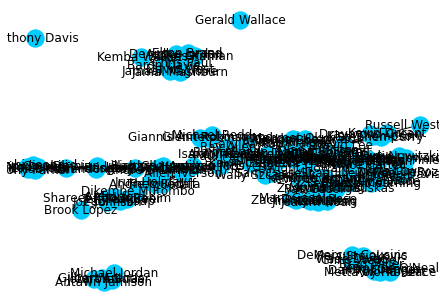

<Figure size 3600x3600 with 0 Axes>

In [54]:
G = nx.projected_graph(B, nodes_0)

nx.draw(G,
pos=nx.spring_layout(G),
with_labels = True,
node_color = '#00CCFF')

plt.figure(figsize=(50,50)) 
# Choose your output:
plt.show()

In [55]:
E = bipartite.weighted_projected_graph(B,nodes_0)

labels = nx.get_edge_attributes(E,'weight')

labels

{('Ray Allen', 'Kevin Garnett'): 1,
 ('Ray Allen', 'Paul Pierce'): 1,
 ('Ray Allen', 'Rashard Lewis'): 1,
 ('Ray Allen', 'Michael Redd'): 1,
 ('Ray Allen', 'Gary Payton'): 1,
 ('Ray Allen', 'Isaiah Thomas'): 1,
 ('Ray Allen', 'Glenn Robinson'): 1,
 ('Ray Allen', 'Giannis Antetokounmpo'): 1,
 ('Ray Allen', 'Rajon Rondo'): 1,
 ('Ray Allen', 'Antoine Walker'): 1,
 ('Pau Gasol', 'Kobe Bryant'): 1,
 ('Pau Gasol', 'Luol Deng'): 1,
 ('Pau Gasol', 'Andrew Bynum'): 1,
 ('Pau Gasol', 'Jimmy Butler'): 1,
 ('Pau Gasol', 'Joakim Noah'): 1,
 ('Pau Gasol', "Shaquille O'Neal"): 1,
 ('Pau Gasol', 'Dwight Howard'): 1,
 ('Pau Gasol', 'Marc Gasol'): 1,
 ('Pau Gasol', 'Derrick Rose'): 1,
 ('Pau Gasol', 'Zach Randolph'): 1,
 ('Anthony Mason', 'Dwyane Wade'): 1,
 ('Anthony Mason', "Shaquille O'Neal"): 1,
 ('Anthony Mason', 'Alonzo Mourning'): 1,
 ('Anthony Mason', 'LeBron James'): 1,
 ('Anthony Mason', 'Chris Bosh'): 1,
 ('David Robinson', 'Kawhi Leonard'): 1,
 ('David Robinson', 'Manu Ginobili'): 1,
 ('Davi

In [56]:
pos=nx.spring_layout(E)

{('Ray Allen',
  'Kevin Garnett'): Text(0.16492755999507458, 0.31565387899331543, '1'),
 ('Ray Allen',
  'Paul Pierce'): Text(0.17244617267309548, 0.3521130158345023, '1'),
 ('Ray Allen',
  'Rashard Lewis'): Text(0.06804899357103776, 0.3348996527049276, '1'),
 ('Ray Allen',
  'Michael Redd'): Text(0.14275088179471512, 0.3998760390602439, '1'),
 ('Ray Allen',
  'Gary Payton'): Text(0.10033457469455875, 0.36296071867907587, '1'),
 ('Ray Allen',
  'Isaiah Thomas'): Text(0.16082118735273698, 0.3425975253127409, '1'),
 ('Ray Allen',
  'Glenn Robinson'): Text(0.15740772085275817, 0.39693885038249094, '1'),
 ('Ray Allen',
  'Giannis Antetokounmpo'): Text(0.14889800096998435, 0.39029075919257405, '1'),
 ('Ray Allen',
  'Rajon Rondo'): Text(0.1717190011621294, 0.34300328789781664, '1'),
 ('Ray Allen',
  'Antoine Walker'): Text(0.16283113803891813, 0.3515082384877012, '1'),
 ('Pau Gasol',
  'Kobe Bryant'): Text(-0.1601422012612419, 0.14458156216331103, '1'),
 ('Pau Gasol',
  'Luol Deng'): Text(-

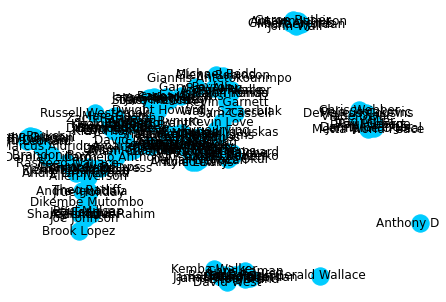

In [57]:
nx.draw(E,pos,with_labels = True,
node_color = '#00CCFF')
nx.draw_networkx_edge_labels(E,pos,edge_labels=labels)

Group: 1 
 ['Allan Houston', 'Alonzo Mourning', "Amar'e Stoudemire", 'Andrei Kirilenko', 'Andrew Bynum', 'Anthony Mason', 'Antoine Walker', 'Antonio Davis', 'Carlos Boozer', 'Carmelo Anthony', 'Chris Bosh', 'David Lee', 'DeMar DeRozan', 'Deron Williams', 'Derrick Rose', 'Devin Harris', 'Dirk Nowitzki', 'Draymond Green', 'Dwight Howard', 'Dwyane Wade', 'Gary Payton', 'Giannis Antetokounmpo', 'Glenn Robinson', 'Gordon Hayward', 'Grant Hill', 'Isaiah Thomas', 'Jameer Nelson', 'James Harden', 'Jason Kidd', 'Jimmy Butler', 'Joakim Noah', 'Josh Howard', 'Karl Malone', 'Kenyon Martin', 'Kevin Durant', 'Kevin Garnett', 'Kevin Love', 'Klay Thompson', 'Kobe Bryant', 'Kyle Lowry', 'Kyrie Irving', 'Latrell Sprewell', 'LeBron James', 'Luol Deng', 'Marc Gasol', 'Mehmet Okur', 'Michael Finley', 'Michael Redd', 'Mo Williams', 'Pau Gasol', 'Paul Pierce', 'Rajon Rondo', 'Rashard Lewis', 'Ray Allen', 'Russell Westbrook', 'Sam Cassell', "Shaquille O'Neal", 'Shawn Marion', 'Stephen Curry', 'Stephon Marbury

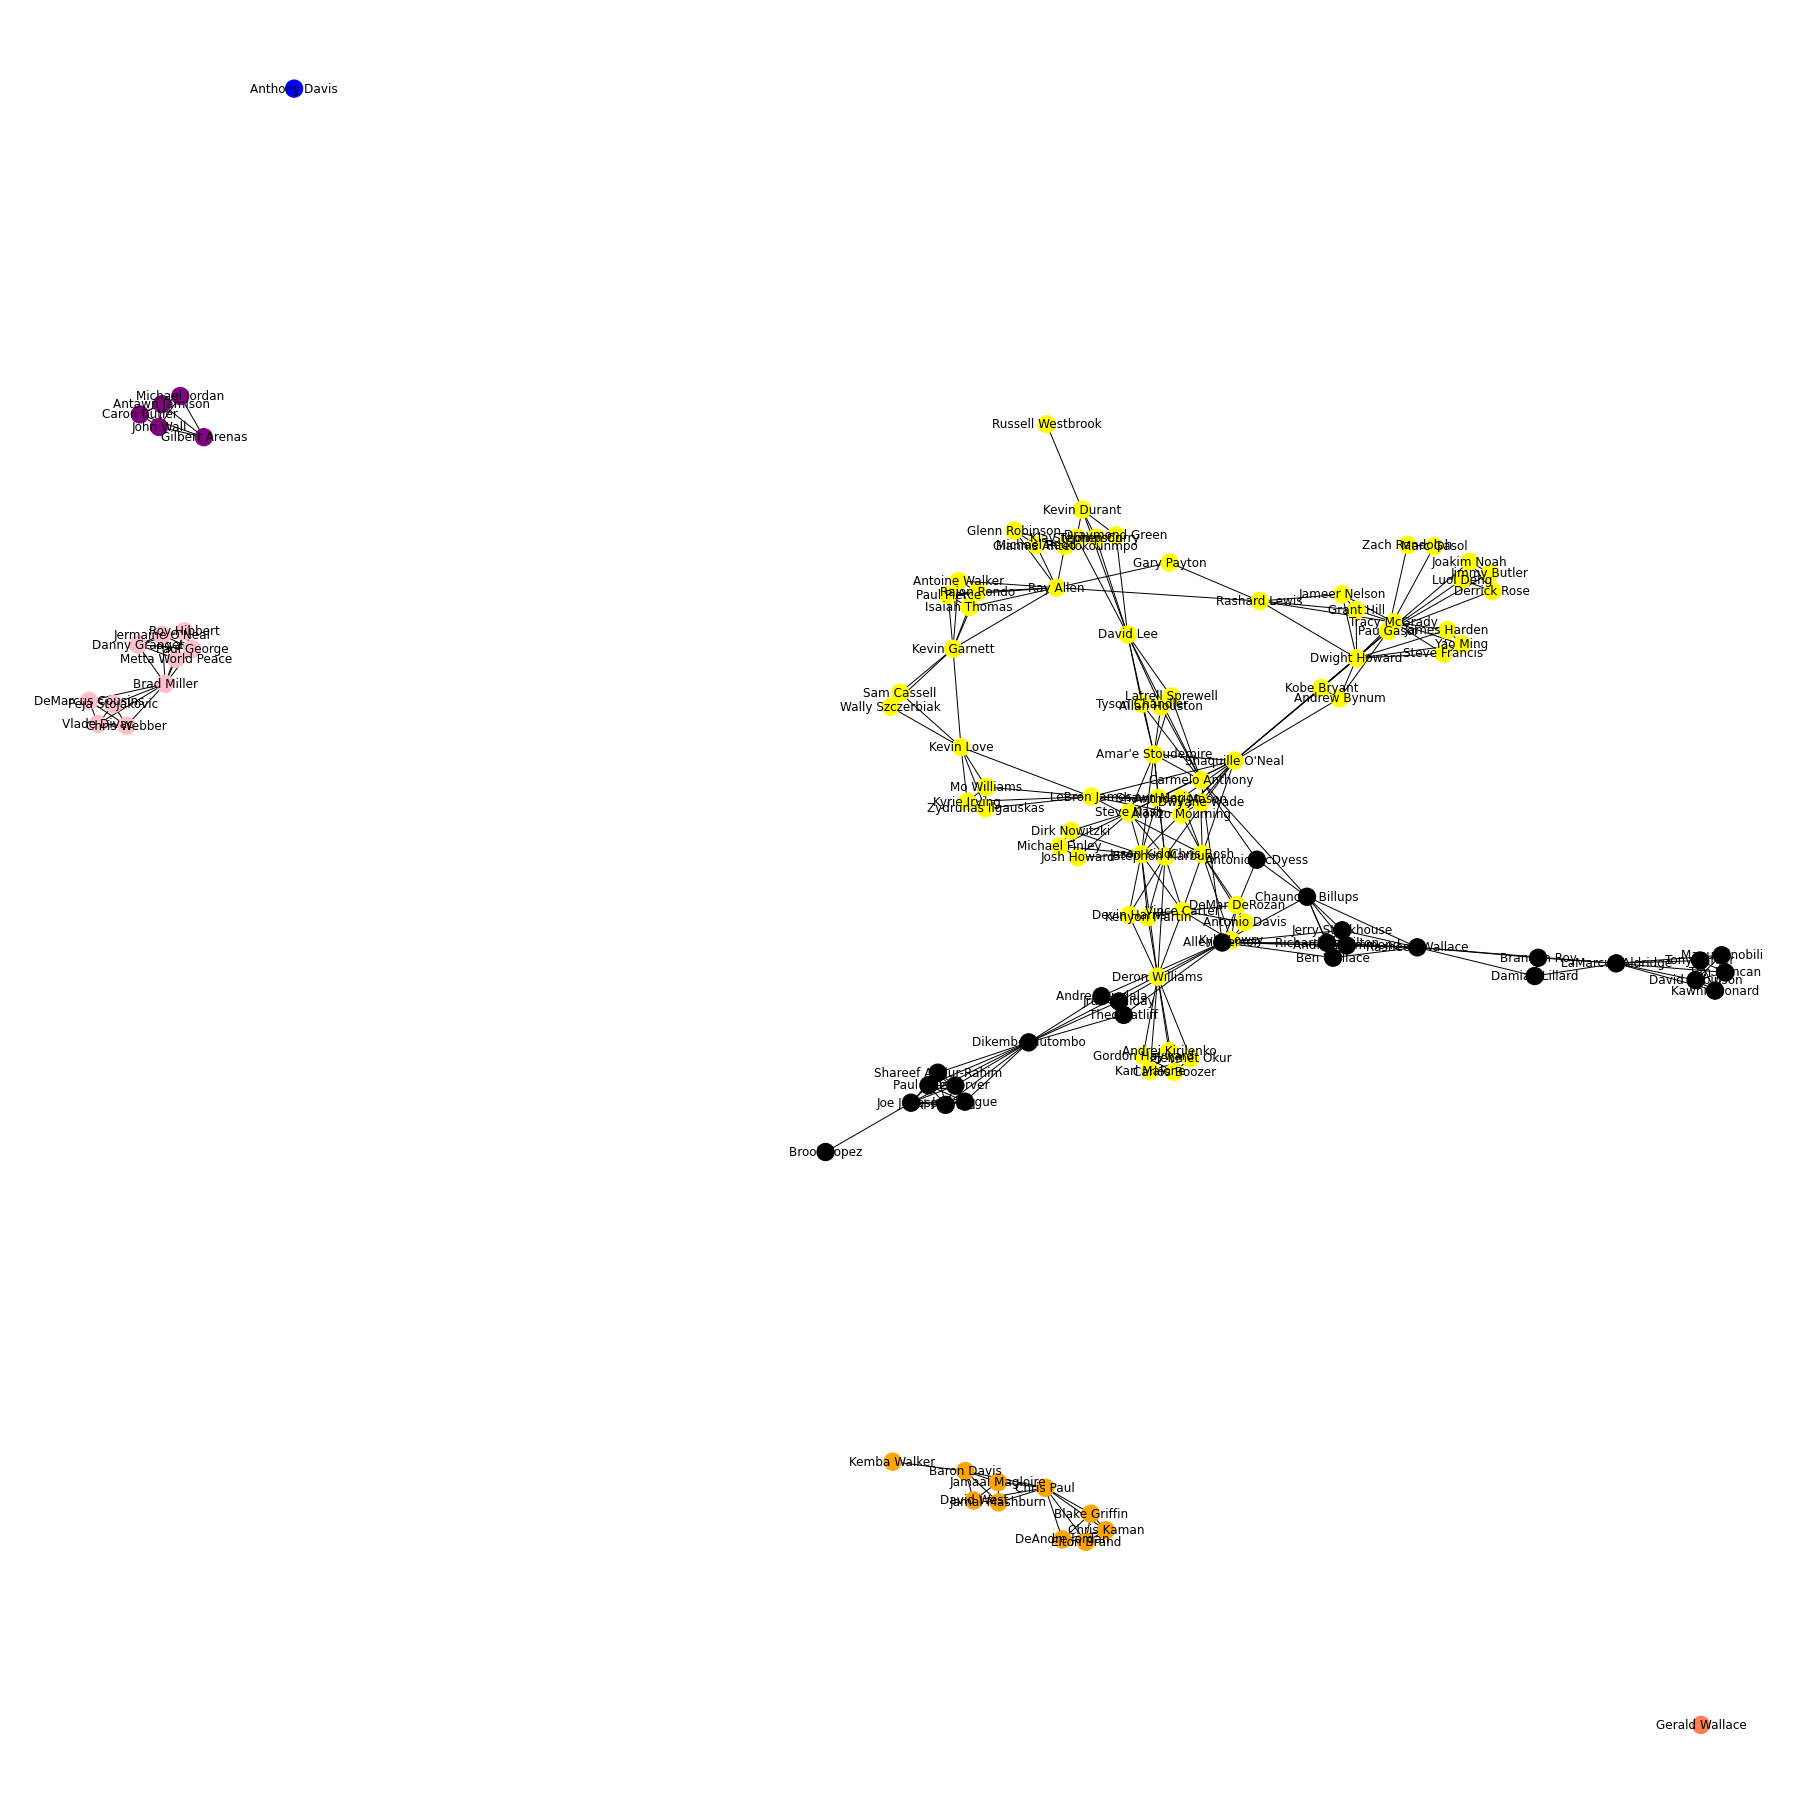

In [58]:
import itertools

k = 1

comp = girvan_newman(E)
for communities in itertools.islice(comp, k):
    node_groups = tuple(sorted(c) for c in communities)
    color_map = []
    for node in E:
        if node in node_groups[0]:
            color_map.append('yellow')
        elif node in node_groups[1]:
            color_map.append('black')
        elif node in node_groups[2]:
            color_map.append('blue')
        elif node in node_groups[3]:
            color_map.append('orange')
        elif node in node_groups[4]:
            color_map.append('pink')
        elif node in node_groups[5]:
            color_map.append('purple')
        else:
            color_map.append('coral')
        # Take user input
    number = 0 

    # Condition of the while loop
    while number < len(node_groups):  
        print("Group:", number+1,"\n", node_groups[number])
        # Increment the value of the variable "number by 1"
        number = number+1
    
    plt.figure(figsize=(25,25)) 
    nx.draw(G,node_color=color_map,with_labels=True)
    plt.show()

In [63]:
# 1. Closeness
cl=nx.closeness_centrality(B)
cl

{'Ray Allen': 0.08203895463510848,
 'Pau Gasol': 0.11119972050066838,
 'Anthony Mason': 0.10689358098241926,
 'David Robinson': 0.061745107962213226,
 'Rajon Rondo': 0.07024892522647014,
 'Anthony Davis': 0.00641025641025641,
 'Rashard Lewis': 0.09557287586819155,
 'Dwyane Wade': 0.10689358098241926,
 'Michael Finley': 0.09518515629063297,
 'Andrei Kirilenko': 0.0795360712733594,
 'Antonio McDyess': 0.09858462615815557,
 "Amar'e Stoudemire": 0.13445926089192564,
 'Deron Williams': 0.09879217273954116,
 'Kevin Love': 0.09329280725901004,
 'Jerry Stackhouse': 0.08532051282051283,
 'Jason Kidd': 0.1244728966877508,
 'Brandon Roy': 0.07208338256725354,
 'Richard Hamilton': 0.08532051282051283,
 'Manu Ginobili': 0.061745107962213226,
 'Jrue Holiday': 0.08485765289562758,
 'Baron Davis': 0.02977667493796526,
 'Vlade Divac': 0.024238782051282052,
 'Jamaal Magloire': 0.026373626373626374,
 'James Harden': 0.08955397338030927,
 'Paul Millsap': 0.07153396654158849,
 'Roy Hibbert': 0.025854700854

In [64]:
sorted_cl_book1 = (sorted(cl.items(), key=lambda x: x[1], reverse=True))[:10]
sorted_cl_book1

[('Phoenix Suns', 0.13966155372405373),
 ("Shaquille O'Neal", 0.13681131793376694),
 ("Amar'e Stoudemire", 0.13445926089192564),
 ('New York Knicks', 0.12927350427350426),
 ('Los Angeles Lakers', 0.12682778932778932),
 ('Jason Kidd', 0.1244728966877508),
 ('Miami Heat', 0.12381604762871254),
 ('Stephon Marbury', 0.12316609462278755),
 ('Carmelo Anthony', 0.1206331158130644),
 ('Steve Nash', 0.11970990319204605)]

In [65]:
# 2. Betweenness
bw=nx.betweenness_centrality(B)
bw

{'Ray Allen': 0.06760408050730632,
 'Pau Gasol': 0.07601323407775021,
 'Anthony Mason': 0.0,
 'David Robinson': 0.0,
 'Rajon Rondo': 0.0,
 'Anthony Davis': 0.0,
 'Rashard Lewis': 0.08094154948993659,
 'Dwyane Wade': 0.0,
 'Michael Finley': 0.0,
 'Andrei Kirilenko': 0.0,
 'Antonio McDyess': 0.0,
 "Amar'e Stoudemire": 0.28767576509511994,
 'Deron Williams': 0.05707196029776675,
 'Kevin Love': 0.057009925558312656,
 'Jerry Stackhouse': 0.0,
 'Jason Kidd': 0.06952715743038315,
 'Brandon Roy': 0.0,
 'Richard Hamilton': 0.0,
 'Manu Ginobili': 0.0,
 'Jrue Holiday': 0.0,
 'Baron Davis': 0.0016542597187758478,
 'Vlade Divac': 0.0,
 'Jamaal Magloire': 0.0,
 'James Harden': 0.0,
 'Paul Millsap': 0.0,
 'Roy Hibbert': 0.0,
 'David Lee': 0.06600496277915632,
 'Grant Hill': 0.0,
 'DeMarcus Cousins': 0.0,
 'Alonzo Mourning': 0.0,
 'Steve Francis': 0.0,
 'Jameer Nelson': 0.0,
 'Zach Randolph': 0.0,
 'Kyrie Irving': 0.0,
 'Kobe Bryant': 0.0,
 'Karl Malone': 0.0,
 'Antonio Davis': 0.0,
 'Jeff Teague': 0.

In [66]:
sorted_bw_book1 = (sorted(bw.items(), key=lambda x: x[1], reverse=True))[:10]
sorted_bw_book1

[('Phoenix Suns', 0.36320650675489397),
 ('New York Knicks', 0.3194375516956162),
 ("Shaquille O'Neal", 0.30798869589192146),
 ("Amar'e Stoudemire", 0.28767576509511994),
 ('Carmelo Anthony', 0.24466501240694788),
 ('Denver Nuggets', 0.2434656741108354),
 ('Los Angeles Lakers', 0.22811552247036115),
 ('Allen Iverson', 0.18345740281224152),
 ('Miami Heat', 0.1456437827405571),
 ('Dwight Howard', 0.14387234629170112)]

In [27]:
# 3. Hits
h_hits,a_hits = nx.hits(B, max_iter=166)
a_hits

{'Ray Allen': 0.0007855982869130995,
 'Pau Gasol': 0.0103659628774141,
 'Anthony Mason': 0.008406555839806266,
 'David Robinson': 6.38051078304544e-05,
 'Rajon Rondo': 0.0002332271745024102,
 'Anthony Davis': 1.0470774525165034e-166,
 'Rashard Lewis': 0.003092607079538617,
 'Dwyane Wade': 0.008406555839806266,
 'Michael Finley': 0.010673252209065927,
 'Andrei Kirilenko': 0.003791252941709114,
 'Antonio McDyess': 0.0015233927899093696,
 "Amar'e Stoudemire": 0.02413368940269617,
 'Deron Williams': 0.018417936138989965,
 'Kevin Love': 0.0021493896429631188,
 'Jerry Stackhouse': 0.0013782054850187565,
 'Jason Kidd': 0.043911964732330624,
 'Brandon Roy': 0.00024616058759785654,
 'Richard Hamilton': 0.0013782054850187565,
 'Manu Ginobili': 6.38051078304544e-05,
 'Jrue Holiday': 0.0006459756216561905,
 'Baron Davis': 1.2273440529054781e-36,
 'Vlade Divac': 1.9941844949769637e-31,
 'Jamaal Magloire': 9.880219464968444e-37,
 'James Harden': 0.002590947362625112,
 'Paul Millsap': 0.0002365562203

In [28]:
sorted_hits1 = (sorted(h_hits.items(), key=lambda x: x[1], reverse=True))[:10]
sorted_hits1

[('Jason Kidd', 0.06643488590538142),
 ("Shaquille O'Neal", 0.051886564507835825),
 ('Stephon Marbury', 0.050287207315514657),
 ('Phoenix Suns', 0.050164815099310256),
 ('Steve Nash', 0.044306018857333755),
 ('New Jersey Nets', 0.03942315183813962),
 ("Amar'e Stoudemire", 0.03651211945974167),
 ('Vince Carter', 0.029302020749486114),
 ('Dallas Mavericks', 0.028767509131409796),
 ('Shawn Marion', 0.028158340267466993)]

In [29]:
sorted_hits2 = (sorted(a_hits.items(), key=lambda x: x[1], reverse=True))[:10]
sorted_hits2

[('Phoenix Suns', 0.10298897119993365),
 ('New Jersey Nets', 0.08093620680234624),
 ('Dallas Mavericks', 0.05906004364749344),
 ('Miami Heat', 0.046517363695181314),
 ('Jason Kidd', 0.043911964732330624),
 ('Los Angeles Lakers', 0.04026848304523605),
 ("Shaquille O'Neal", 0.03429585164037244),
 ('Stephon Marbury', 0.03323871252326469),
 ('New York Knicks', 0.030553900424230337),
 ('Steve Nash', 0.02928528153504977)]

In [30]:
# 4. PageRank
pr=nx.pagerank(B)
pr

{'Ray Allen': 0.008688055355172714,
 'Pau Gasol': 0.00863778954965002,
 'Anthony Mason': 0.0032732677339519602,
 'David Robinson': 0.0036887983921895374,
 'Rajon Rondo': 0.003479710462950122,
 'Anthony Davis': 0.006369426751592357,
 'Rashard Lewis': 0.005769301528987074,
 'Dwyane Wade': 0.0032732677339519602,
 'Michael Finley': 0.003302835691009814,
 'Andrei Kirilenko': 0.003622942495510099,
 'Antonio McDyess': 0.0032361826613331738,
 "Amar'e Stoudemire": 0.005367012215951313,
 'Deron Williams': 0.005828528067804499,
 'Kevin Love': 0.006055032280270418,
 'Jerry Stackhouse': 0.0033045953777897635,
 'Jason Kidd': 0.00757896655300217,
 'Brandon Roy': 0.003530465778955431,
 'Richard Hamilton': 0.0033045953777897635,
 'Manu Ginobili': 0.0036887983921895374,
 'Jrue Holiday': 0.003427830800081978,
 'Baron Davis': 0.006736028809035078,
 'Vlade Divac': 0.0037693155032171625,
 'Jamaal Magloire': 0.0036552810073237755,
 'James Harden': 0.003375681018198737,
 'Paul Millsap': 0.0035618562934391623,

In [31]:
sorted_pagerank = (sorted(h_hits.items(), key=lambda x: x[1], reverse=True))[:10]
sorted_pagerank

[('Jason Kidd', 0.06643488590538142),
 ("Shaquille O'Neal", 0.051886564507835825),
 ('Stephon Marbury', 0.050287207315514657),
 ('Phoenix Suns', 0.050164815099310256),
 ('Steve Nash', 0.044306018857333755),
 ('New Jersey Nets', 0.03942315183813962),
 ("Amar'e Stoudemire", 0.03651211945974167),
 ('Vince Carter', 0.029302020749486114),
 ('Dallas Mavericks', 0.028767509131409796),
 ('Shawn Marion', 0.028158340267466993)]